In [1277]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [1278]:
import warnings
warnings.filterwarnings('ignore') #Added for unelegant shape of warnings

In [1279]:
df = pd.read_csv('elec_consump.csv',encoding="ISO-8859-1") #read data

In [1280]:
df.rename(columns={'Tarih': 'Date',"Saat":"Hour","Tüketim Miktarý (MWh)":"Consumption_Amount"}, inplace=True) #changed column names

In [1281]:
for i in range(0,len(df["Hour"])):  #deleted the first "0" of all hours to use them propely in further parts
    if df["Hour"].iloc[i].startswith("0"):
        df["Hour"].iloc[i]=df["Hour"].iloc[i][1:]  

In [1282]:
df["Consumption_Amount"]=df["Consumption_Amount"].str.replace(".","")   

In [1283]:
df["Consumption_Amount"]=df["Consumption_Amount"].str.replace(",",".")

In [1284]:
df["Consumption_Amount"] = df["Consumption_Amount"].apply(pd.to_numeric)    #transformed the format of consumption into float

In [1285]:
df["Date"]=pd.to_datetime(df['Date'])   #transformed the format of dates into datetime

In [1286]:
df["Consumption_Amount"]

0        26277.24
1        24991.82
2        23532.61
3        22464.78
4        22002.91
           ...   
43123    40720.16
43124    39195.74
43125    38310.79
43126    37173.97
43127    35725.46
Name: Consumption_Amount, Length: 43128, dtype: float64

In [1287]:
df.insert(0,"index",range(0,len(df)))

In [1288]:
print(df)

       index       Date   Hour  Consumption_Amount
0          0 2016-01-01   0:00            26277.24
1          1 2016-01-01   1:00            24991.82
2          2 2016-01-01   2:00            23532.61
3          3 2016-01-01   3:00            22464.78
4          4 2016-01-01   4:00            22002.91
...      ...        ...    ...                 ...
43123  43123 2020-01-12  19:00            40720.16
43124  43124 2020-01-12  20:00            39195.74
43125  43125 2020-01-12  21:00            38310.79
43126  43126 2020-01-12  22:00            37173.97
43127  43127 2020-01-12  23:00            35725.46

[43128 rows x 4 columns]


In [1289]:
df[df["Date"]=="2020-01-11"]["index"].head()   #Determined starting index of test data to split data into test and train

42384    42384
42385    42385
42386    42386
42387    42387
42388    42388
Name: index, dtype: int32

In [1290]:
df_test=df.iloc[42384:,:]

In [1291]:
print(df_test)  #stated test dataframe

       index       Date   Hour  Consumption_Amount
42384  42384 2020-01-11   0:00            28701.62
42385  42385 2020-01-11   1:00            27254.15
42386  42386 2020-01-11   2:00            26078.57
42387  42387 2020-01-11   3:00            25449.47
42388  42388 2020-01-11   4:00            25324.01
...      ...        ...    ...                 ...
43123  43123 2020-01-12  19:00            40720.16
43124  43124 2020-01-12  20:00            39195.74
43125  43125 2020-01-12  21:00            38310.79
43126  43126 2020-01-12  22:00            37173.97
43127  43127 2020-01-12  23:00            35725.46

[744 rows x 4 columns]


In [1292]:
test_y=df_test["Consumption_Amount"]

In [1293]:
test_y

42384    28701.62
42385    27254.15
42386    26078.57
42387    25449.47
42388    25324.01
           ...   
43123    40720.16
43124    39195.74
43125    38310.79
43126    37173.97
43127    35725.46
Name: Consumption_Amount, Length: 744, dtype: float64

In [1294]:
lag_168=df_test["index"].to_numpy()-168     #The consumption value of 168 hours ago was used for prediction

In [1295]:
lag_168_pred=df[df["index"].isin(lag_168)]["Consumption_Amount"].to_numpy()  #Lag 168 value calculated for the purpose stated above

In [1296]:
test_y_nump=test_y.to_numpy()

In [1297]:
err_168=np.abs((test_y_nump-lag_168_pred)/test_y_nump)*100      #mape formula was applied

In [1298]:
np.mean(err_168)    #mape value was calculated

3.449188482612284

In [1299]:
lag_48=df_test["index"].to_numpy()-48      #The consumption value of 48 hours ago was used for prediction

In [1300]:
lag_48_pred=df[df["index"].isin(lag_48)]["Consumption_Amount"].to_numpy()    #Lag 48 value calculated for the purpose stated above

In [1301]:
err_48=np.abs((test_y_nump-lag_48_pred)/test_y_nump)*100

In [1302]:
np.mean(err_48)  #mape value was calculated

8.060314509077507

In [ ]:
#Mape value of Lag 168 is better than Lag48. So, we can say that using Lag 168 has better forecasting performance.

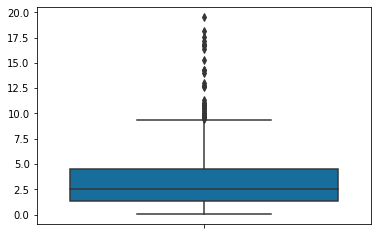

In [1396]:
sns.boxplot(y=(err_168),palette="colorblind")

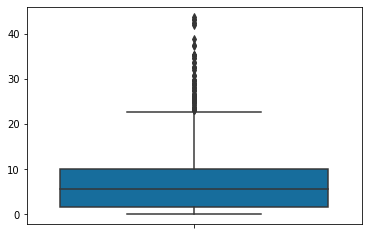

In [1395]:
sns.boxplot(y=(err_48),palette="colorblind")

In [ ]:
#Part b

In [1304]:
lag_168_ind=df["index"].iloc[168:]    

In [1305]:
a=lag_168_ind.to_numpy()-168    #Calculated lag 168 values

In [1306]:
df[df["index"].isin(a)]["Consumption_Amount"]    

0        26277.24
1        24991.82
2        23532.61
3        22464.78
4        22002.91
           ...   
42955    40895.17
42956    39240.65
42957    38366.41
42958    37446.73
42959    36186.83
Name: Consumption_Amount, Length: 42960, dtype: float64

In [1307]:
cols=["index","Date","Hour","Lag_48","Lag_168","Consumption_Amount"]  #Started to prepare for long format

In [1308]:
new_df=pd.DataFrame(columns=cols)

In [1309]:
new_df["Lag_168"]=df[df["index"].isin(a)]["Consumption_Amount"]

In [1310]:
new_df["index"]=range(168,len(df))

In [1311]:
lag_48_ind=df["index"].iloc[168:]          #Calculated lag 168 values

In [1312]:
b=lag_48_ind.to_numpy()-48       

In [1313]:
df[df["index"].isin(b)]["Consumption_Amount"]

120      29189.27
121      27614.02
122      26578.97
123      25719.19
124      25864.63
           ...   
43075    36310.77
43076    35383.08
43077    34491.45
43078    33698.14
43079    32295.74
Name: Consumption_Amount, Length: 42960, dtype: float64

In [1314]:
lag_48_vals=df[df["index"].isin(b)]["Consumption_Amount"].to_frame()

In [1315]:
lag_48_vals.reset_index(inplace=True)

In [1316]:
lag_48_vals=lag_48_vals["Consumption_Amount"]

In [1317]:
new_df["Lag_48"]=lag_48_vals

In [1318]:
df[df["index"]>167]["Consumption_Amount"]

168      28602.02
169      27112.37
170      25975.34
171      25315.55
172      25128.15
           ...   
43123    40720.16
43124    39195.74
43125    38310.79
43126    37173.97
43127    35725.46
Name: Consumption_Amount, Length: 42960, dtype: float64

In [1319]:
cons_vals=df[df["index"]>167]["Consumption_Amount"].to_frame()   #Consumption values were arranged based on lag values for long format

In [1320]:
cons_vals.reset_index(inplace=True)

In [1321]:
cons_vals=cons_vals["Consumption_Amount"]

In [1322]:
new_df["Consumption_Amount"]=cons_vals

In [1323]:
df[df["index"]>167]["Date"]

168     2016-08-01
169     2016-08-01
170     2016-08-01
171     2016-08-01
172     2016-08-01
           ...    
43123   2020-01-12
43124   2020-01-12
43125   2020-01-12
43126   2020-01-12
43127   2020-01-12
Name: Date, Length: 42960, dtype: datetime64[ns]

In [1324]:
dates=df[df["index"]>167]["Date"].to_frame()    #Indexes were arranged based on lag values for long format

In [1325]:
dates.reset_index(inplace=True)

In [1326]:
dates=dates["Date"]

In [1327]:
new_df["Date"]=dates

In [1328]:
df[df["index"]>167]["Hour"]

168       0:00
169       1:00
170       2:00
171       3:00
172       4:00
         ...  
43123    19:00
43124    20:00
43125    21:00
43126    22:00
43127    23:00
Name: Hour, Length: 42960, dtype: object

In [1329]:
hours=df[df["index"]>167]["Hour"].to_frame() #Hours were arranged based on lag values for long format

In [1330]:
hours.reset_index(inplace=True)

In [1331]:
hours=hours["Hour"]

In [1332]:
new_df["Hour"]=hours

In [1333]:
print(new_df)

       index       Date   Hour    Lag_48   Lag_168  Consumption_Amount
0        168 2016-08-01   0:00  29189.27  26277.24            28602.02
1        169 2016-08-01   1:00  27614.02  24991.82            27112.37
2        170 2016-08-01   2:00  26578.97  23532.61            25975.34
3        171 2016-08-01   3:00  25719.19  22464.78            25315.55
4        172 2016-08-01   4:00  25864.63  22002.91            25128.15
...      ...        ...    ...       ...       ...                 ...
42955  43123 2020-01-12  19:00  36310.77  40895.17            40720.16
42956  43124 2020-01-12  20:00  35383.08  39240.65            39195.74
42957  43125 2020-01-12  21:00  34491.45  38366.41            38310.79
42958  43126 2020-01-12  22:00  33698.14  37446.73            37173.97
42959  43127 2020-01-12  23:00  32295.74  36186.83            35725.46

[42960 rows x 6 columns]


In [1334]:
new_df[new_df["Date"]=="2016-03-27"]["Hour"]

1896     0:00
1897     1:00
1898     2:00
1899     4:00
1900     4:00
1901     5:00
1902     6:00
1903     7:00
1904     8:00
1905     9:00
1906    10:00
1907    11:00
1908    12:00
1909    13:00
1910    14:00
1911    15:00
1912    16:00
1913    17:00
1914    18:00
1915    19:00
1916    20:00
1917    21:00
1918    22:00
1919    23:00
Name: Hour, dtype: object

In [1335]:
junk1=new_df[new_df["Date"]=="2016-03-27"].index
junk2=new_df[new_df["Date"]=="2016-03-29"].index   
junk3=new_df[new_df["Date"]=="2016-04-03"].index

In [1336]:
new_df.drop(junk1,axis=0,inplace=True)
new_df.drop(junk2,axis=0,inplace=True)  # Three date point in data was discarded to cleanse inappropriate hours related to sunlight program in Turkey 
new_df.drop(junk3,axis=0,inplace=True)

In [1373]:
X_train=new_df.loc[:42216,["Lag_48","Lag_168"]]   #Lag data was splitted into test and train
X_test=new_df.loc[42216:,["Lag_48","Lag_168"]]

In [1374]:
y_train = new_df.loc[:42216,'Consumption_Amount']             #Consumption data was splitted into test and train
y_test = new_df.loc[42216:,'Consumption_Amount'].to_numpy()

In [1375]:
model=linear_model.LinearRegression() 

In [1376]:
model.fit(X_train,y_train)      #Prediction was made on Lag48 and Lag168 data by fitting linear model
predicted=model.predict(X_test)

In [1377]:
MAPE=np.mean(np.abs((y_test - predicted)/ y_test))*100   

In [1378]:
print(MAPE)    #MAPE value was calculated

4.233438452971358


In [1342]:
model.coef_     #Coefficients were calculated

array([0.3092438 , 0.64270557])

In [1343]:
model.intercept_  #Intercept was calculated

1573.6541160669403

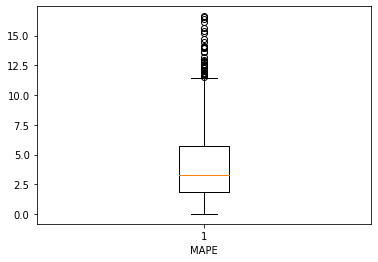

In [1387]:
APE=np.abs((y_test - predicted)/y_test)*100
plt.boxplot(APE)
plt.xlabel('MAPE')  
plt.show()

In [ ]:
#MAPE value of linear regression is higher than Lag168 MAPE value but better than Lag48 value which infers using Lag 168
# consumption values are better in terms of forecasting compared to linear regression for this data.

In [1174]:
#Part c

In [1354]:
features=['Lag_48','Lag_168']
final_df = pd.DataFrame()

for i in range(0,24):
    hour_data=new_df[new_df['Hour']==str(i)+':00']   #Seperated each hour nodes
    index_of_test=np.where(hour_data['Date']=="2020-01-11")
    train_data=hour_data.iloc[0:index_of_test[0][0],:]  #data splitted as train and test
    test_data=hour_data.iloc[index_of_test[0][0]:,:]
    train_X = train_data.loc[:,features]
    test_X = test_data.loc[:,features]

    train_y = train_data.loc[:,'Consumption_Amount']
    test_y = test_data.loc[:"Consumption_Amount"]

    model = linear_model.LinearRegression() 
    model.fit(train_X, train_y)
    predicted = model.predict(test_X)
    predicted_df = pd.DataFrame()
    predicted_df['Date']=test_data.loc[:,'Date']
    predicted_df['Hour']=test_data.loc[:,'Hour']  
    predicted_df['Consumption_Prediction']=predicted
    predicted_df['Actual_Consumption']=test_data.loc[:,'Consumption_Amount']
    final_df=pd.concat([final_df, predicted_df], axis=0, sort=False)
print(final_df)

            Date   Hour  Consumption_Prediction  Actual_Consumption
42216 2020-01-11   0:00            29397.890757            28701.62
42240 2020-02-11   0:00            29199.239620            27931.36
42264 2020-03-11   0:00            29773.090504            31301.07
42288 2020-04-11   0:00            29232.026265            31278.36
42312 2020-05-11   0:00            30422.724214            31494.01
...          ...    ...                     ...                 ...
42863 2020-11-27  23:00            35422.381959            36119.57
42887 2020-11-28  23:00            34813.837657            34500.14
42911 2020-11-29  23:00            34023.227558            32295.74
42935 2020-11-30  23:00            34905.045490            35775.04
42959 2020-01-12  23:00            34189.986217            35725.46

[744 rows x 4 columns]


In [ ]:
#The predicted value and actual value of consumption was given for each hour.

In [1363]:
def MAPE(actual, prediction): 
    actual, prediction = np.array(actual), np.array(prediction)
    abs_MAPE = np.abs((actual - prediction) / actual)
    return np.mean(abs_MAPE) * 100

In [1364]:
act=final_df["Actual_Consumption"].to_numpy()

In [1365]:
pre=final_df["Consumption_Prediction"].to_numpy()

In [1383]:
abs_MAPE=np.abs((act - pre) / act)

In [1366]:
MAPE(act,pre)

4.363534872320953

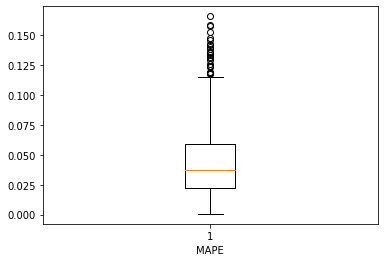

In [1386]:
plt.boxplot(abs_MAPE)
plt.xlabel('MAPE')  
plt.show()

In [ ]:
#Seasonality was checked for data to understand whether nights or evenings may differ in terms of consumption. MAPE value of hourly seperated
#data is close to MAPE value of linear regression.

In [ ]:
#Part d

In [763]:
new_df[new_df["Date"]=="2020-01-11"]["index"]  #Determined starting index of test data

42216    42384
42217    42385
42218    42386
42219    42387
42220    42388
42221    42389
42222    42390
42223    42391
42224    42392
42225    42393
42226    42394
42227    42395
42228    42396
42229    42397
42230    42398
42231    42399
42232    42400
42233    42401
42234    42402
42235    42403
42236    42404
42237    42405
42238    42406
42239    42407
Name: index, dtype: int32

In [1175]:
train=new_df.iloc[0:42216,:]
test=new_df.iloc[42216:,:]   #Splitted into trained and test

In [1176]:
train_=train.pivot(index='Date', columns='Hour', values=["Lag_48","Lag_168","Consumption_Amount"]) #48 features (72 with consumption amount actual values) was build such as 2 days ago and 7days ago
test_=test.pivot(index='Date', columns='Hour', values=["Lag_48","Lag_168","Consumption_Amount"]) #by using Lag-168 and Lag-48 values.

In [1177]:
print(train_)

              Lag_48                                                    \
Hour            0:00     10:00     11:00     12:00     13:00     14:00   
Date                                                                     
2016-01-02  30323.74  35450.49  36294.06  35204.25  34932.17  34697.06   
2016-01-03  26608.30  25826.49  26509.59  26212.86  26348.07  26032.31   
2016-01-04  29087.24  35071.25  35194.04  32717.89  32943.97  33377.70   
2016-01-05  29066.79  35486.60  35810.48  33332.56  32932.17  34391.58   
2016-01-06  25277.75  33473.30  34543.09  32547.88  33332.27  34119.17   
...              ...       ...       ...       ...       ...       ...   
2020-12-06  31368.50  34352.81  35053.05  34043.71  34960.86  36159.30   
2020-12-07  36573.49  38979.89  39817.24  38170.94  38234.85  40311.87   
2020-12-08  34395.34  40157.01  40989.40  39978.07  40967.44  42329.40   
2020-12-09  36451.72  39383.84  40156.17  39060.72  40345.43  42042.97   
2020-12-10  31485.92  32694.83  33100.

In [1178]:
print(test_)

              Lag_48                                                    \
Hour            0:00     10:00     11:00     12:00     13:00     14:00   
Date                                                                     
2020-01-12  32332.68  28332.10  29003.50  28748.98  29081.29  29682.72   
2020-04-11  27931.36  34530.73  34792.40  33256.31  33967.69  35239.46   
2020-05-11  31301.07  35251.33  35451.90  34191.43  35387.31  36868.67   
2020-06-11  31278.36  36953.41  37624.94  36237.72  37090.66  37947.51   
2020-07-11  31494.01  37328.23  37995.61  36673.18  37474.83  38465.18   
2020-08-11  32009.92  37023.74  37426.55  35504.94  35730.20  37473.42   
2020-09-11  32079.29  33640.77  33982.07  32961.52  33436.74  33853.06   
2020-10-11  30770.20  25872.33  26296.87  26247.39  26979.75  27311.96   
2020-11-11  29431.56  34719.78  34762.37  32980.67  33549.23  35004.57   
2020-11-13  32398.76  35411.64  35618.76  34000.28  34739.81  36053.33   
2020-11-14  32363.50  35271.47  35403.

In [1367]:
X_train=train_[['Lag_48', 'Lag_168']]  #Splitted train and test data
X_test=test_[['Lag_48', 'Lag_168']]

In [1369]:
MAPEs={}
err_list = []
for i in range(0,24):
    y_train = train_.loc[:,('Consumption_Amount', str(i)+':00')].to_frame()
    y_test = test_.loc[:,('Consumption_Amount', str(i)+':00')].to_frame()
    alphas = np.logspace(-4, 1, 10)
    lassocv = linear_model.LassoCV(alphas=alphas,cv=10, random_state=0, max_iter = 2000) #10-fold cross validation was performed.
    lassocv.fit(X_train, y_train)
    lassocv_score_train = lassocv.score(X_train, y_train)
    lassocv_score_test = lassocv.score(X_test, y_test)
    lassocv_alphas = lassocv.alphas_
    lassocv_alpha = lassocv.alpha_
    best_lasso = linear_model.Lasso(alpha=lassocv_alpha)
    best_lasso.fit(X_train, y_train)
    predicted_y=best_lasso.predict(X_test)
    err=MAPE(y_test.to_numpy(),predicted_y)
    y_test = y_test.to_numpy().reshape(-1)
    err=MAPE(y_test,predicted_y)
    err_extended = np.divide(np.abs(y_test - predicted_y), y_test) * 100
    err_list.append(err_extended)
    MAPEs[i]=[]
    MAPEs[i].append(err)
MAPEs

{0: [1.3536704422670456],
 1: [1.5160519570354045],
 2: [1.4525255671446071],
 3: [1.3652307976462048],
 4: [1.4420676130392673],
 5: [1.4073896026382995],
 6: [1.642707869571564],
 7: [1.6534942974546285],
 8: [2.216363815066442],
 9: [3.3026764368973054],
 10: [3.8355758583788537],
 11: [4.119821305307467],
 12: [4.485375978959793],
 13: [4.322648430217408],
 14: [4.039716642519007],
 15: [3.490473701876428],
 16: [2.510655502866077],
 17: [1.7786170291159846],
 18: [1.4300401002154561],
 19: [1.3815723162597244],
 20: [1.410609640341767],
 21: [1.4306426582173968],
 22: [1.3740100676891827],
 23: [1.5767204815078324]}

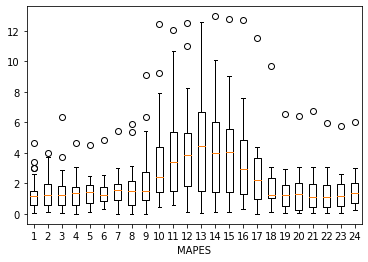

In [1398]:
plt.boxplot(err_list)
plt.xlabel('MAPES')  
plt.show()

In [ ]:
#With 10 fold cross validation best alpha value was tried to find by using L1 penalty.

In [ ]:
#For each hour MAPE values were calculated by using penalized regression. And we can say that it is better to predict consumption,from hours after 17:00 until night and from night
#till the early morning hours for penalized regression approach. Because MAPE values of these hours are relatviely smaller.

In [ ]:
hourly_regression_MAPE=4.363534872320953

In [ ]:
Lag_168_MAPE=3.449188482612284

In [ ]:
Lag_48_MAPE= 8.060314509077507

In [ ]:
regression_MAPE=4.233438452971358

In [1418]:
k=list(MAPEs.values())

In [1427]:
total=0
for i in range(len(k)):
    total+= k[i][0]

In [1429]:
print(total/24)   #average of MAPE values of penalized regression

2.2724440880097143


In [ ]:
# I concluded that it is better to use penalized regression to predict electiricty consumption compared to other approaches. Lag_168 MAPE has
#also better values compared to other approaches. Hourly linear regression and linear regression MAPE values are close to each other. It is not
# that meaningful to use hourly regression based on MAPE values. Since it can be seen that regressin and hourly regression MAPE values are close
#to each other.